# Análise de Dados Abertos


In [121]:
import pandas as pd
import numpy as np
from babel.numbers import format_compact_currency
import matplotlib.pyplot as plt
import locale
import tabulate

locale.setlocale(locale.LC_ALL, "pt_BR")
plt.style.use("default")
excelsheet = "../data/criptoativos_dados_abertos_07082023.xls"

# Carrega a planilha excel
with pd.ExcelFile(excelsheet) as xls:
    df1 = pd.read_excel(
        xls,
        "Relatorio1",
        skiprows=9,
        decimal=",",
        parse_dates=[0],
        date_format="%B de %Y",
        usecols=[0, 3, 6, 7, 8],
    )
    df2 = pd.read_excel(
        xls,
        "Relatorio2",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        decimal=".",
    )
    df3 = pd.read_excel(
        xls,
        "Relatório3",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        header=[0, 1],
    )
    df4 = pd.read_excel(
        xls,
        "Relatorio4",
        skiprows=13,
        decimal=",",
        parse_dates=[1],
        date_format="%B de %Y",
    )


# Utilitários
def format_cols(data):
    return data.apply(lambda x: format_compact_currency(x, currency="BRL", locale="pt_BR", fraction_digits=2))

## Total de Valores Declarados por Ano


<Axes: title={'center': 'Valores Declarados (em milhões)'}, xlabel='Ano'>

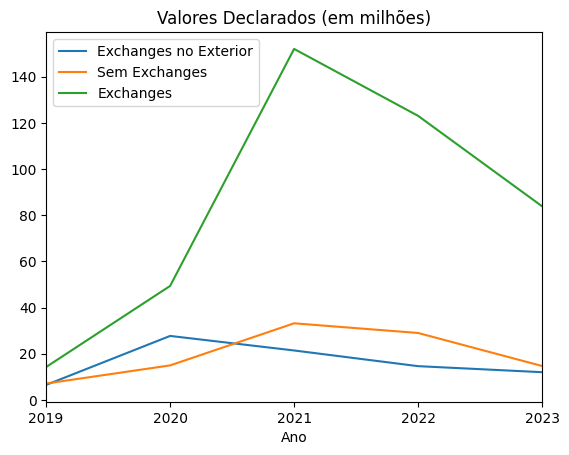

In [122]:
# Renderiza Relatório1
df1 = df1.rename(
    columns={
        "Unnamed: 0": "Ano",
        "Subtotal": "Exchanges no Exterior",
        "Subtotal.1": "Sem Exchanges",
        "Somente PJ": "Exchanges",
        "Unnamed: 8": "Total",
    }
)

df1_new = df1.groupby(pd.Grouper(key=df1.columns[0], freq="Y")).sum()
df1_new = df1_new.apply(lambda x: x/1_000)
df1_new.plot(kind='line',y=df1_new.columns[0:3],title="Valores Declarados (em milhões)")

## Quantidade de CPF/CNPJ Únicos


In [123]:
# Renderiza Relatório2
df2_new = df2.groupby(pd.Grouper(key=df2.columns[0], freq="Y")).sum()
df2_new

,CNPJ,CPF
MÊS/ANO,,
2019-12-31,12121,680054
2020-12-31,37611,1500287
2021-12-31,78290,6030838
2022-12-31,406008,11868506
2023-12-31,409524,11432616


## Operações por gênero


<Axes: xlabel='(% Nº Operações, Masculino)', ylabel='(% Valor Operações, Masculino)'>

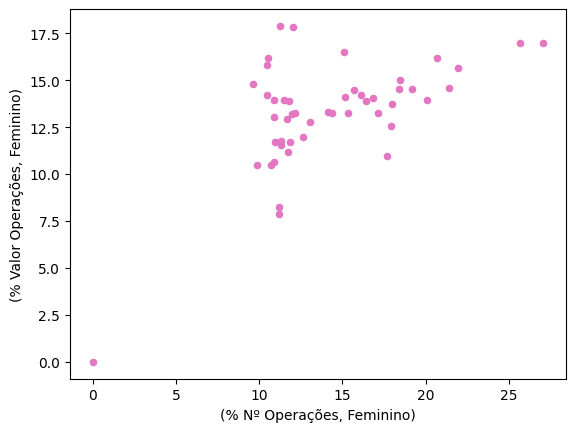

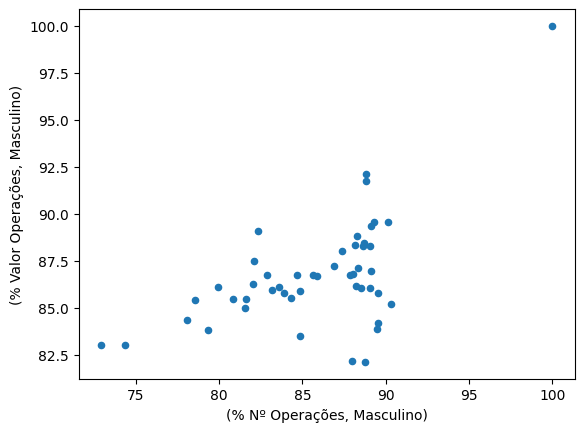

In [124]:
# Renderiza Relatório3, parte 1
# Não vai ser possível unir os dados, já que são porcentagens!\
# df3.info()
ax = df3.plot(kind='scatter',x=df3.columns[1], y=df3.columns[3], c='tab:pink')
df3.plot(kind='scatter',x=df3.columns[2], y=df3.columns[4], c='tab:blue')

# df3['% Nº Operações','Feminino'].corr(df3['% Valor Operações','Feminino'])

## Criptoativos Declarados


AAVE
ADA
BCH
BNB
BRLT
BRZ
BRZX
BSV
BTC
BTG
BTT
BUSD
CBRL
CHZ
COMP
CRV
DAI
DASH
DCR
DGB
DOGE
EOS
ETC
ETH
FIL
ICP
IMOB01
IOTA
LINK
LTC
MATIC
MBCONS02
MBPRK02
MBPRK03
MBPRK04
MCO2
MKR
NANO
NEO
NULS
OKB
OMG
PAX
PAXG
PUNDIX
SNX
SOL
SUSHI
THETA
TRX
TUSD
UNI
USDC
USDP
USDT
VET
WAVES
WBTC
WBX
XLM
XMR
XRP
XTZ
YFI
ZEC
ZRX


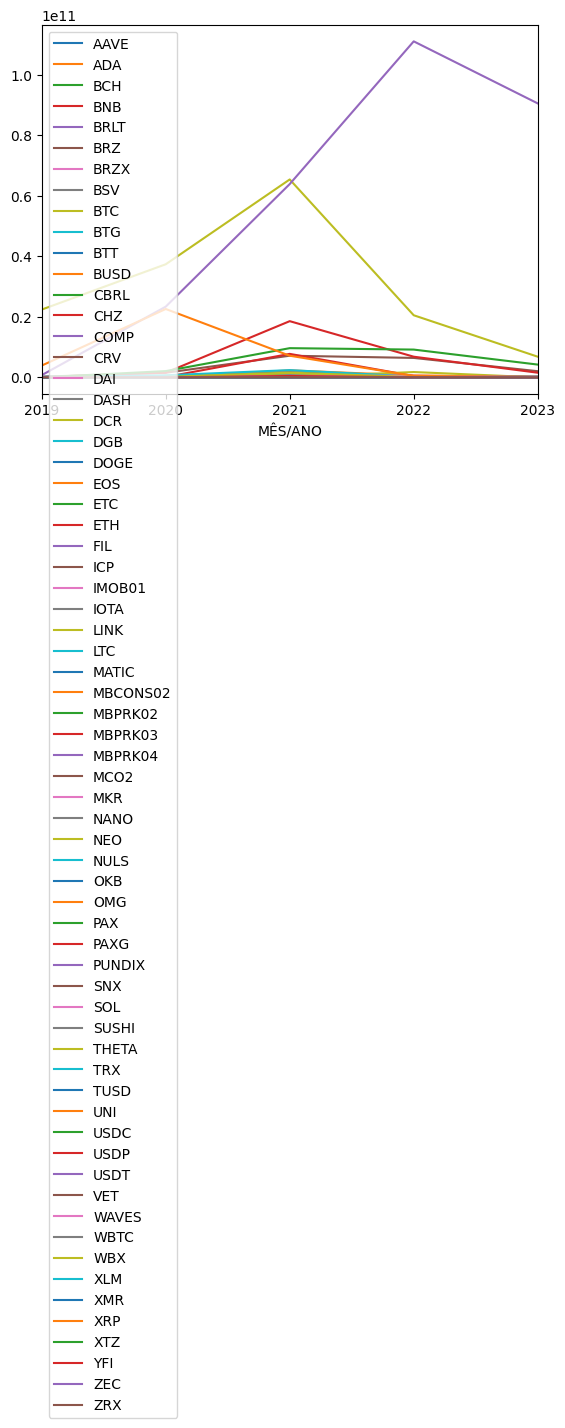

In [136]:
# Renderiza Relatório 4
# https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
# https://pbpython.com/pandas-grouper-agg.html
cryptos = []
for i in df4['CRIPTOATIVO']:
    if i not in cryptos:
        cryptos.append(i)

df4_new = df4.groupby(["CRIPTOATIVO", pd.Grouper(key='MÊS/ANO', freq='Y')])['VALOR TOTAL DAS OPERAÇÕES'].sum()
# for i in range(2019,2024):
#     df4_new[str(i)] = df4_new[str(i)].apply(lambda x: x/1_000_000)
#     df4_new[str(i)].sort_values(axis=0,ascending=False)[0:10].plot(kind='bar', title=f"{i}")
#     plt.show()

for i in cryptos:
    df4_new[i].plot(label=i)
    plt.legend()
